In [790]:
import numpy as np
import scipy as sc
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels as sm
from scipy.stats.distributions import t


In [2]:
Data = pd.read_csv('MTT.csv')

In [18]:
Data

pandas.core.frame.DataFrame

In [756]:
m = Data[Data['line'].str.contains('MCF7')]
d = Data[Data['line'].str.contains('dTKS4')]
l = Data[Data['line'].str.contains('TKS4L+')]
b = Data[Data['line'].str.contains('TKS4b+')]
all = Data


In [755]:
Data

,line,h,od
0,MCF7,18,0.015
1,MCF7,18,0.024
2,MCF7,18,0.039
3,MCF7,18,0.032
4,MCF7,18,0.014
...,...,...,...
115,TKS4b+,210,0.813
116,TKS4b+,210,0.770
117,TKS4b+,210,0.915
118,TKS4b+,210,0.940


In [757]:
m = m[['h', 'od']].groupby('h').agg(['mean', 'std'])
d = d[['h', 'od']].groupby('h').agg(['mean', 'std'])
l = l[['h', 'od']].groupby('h').agg(['mean', 'std'])
b = b[['h', 'od']].groupby('h').agg(['mean', 'std'])
all = all[['h', 'od']].groupby('h').agg(['mean', 'std'])

In [758]:
all

od          
         mean       std
h                      
18   0.020792  0.007879
66   0.031875  0.010481
117  0.083417  0.037735
162  0.205333  0.054743
210  0.776375  0.244503

In [784]:
X = np.float64(np.array([18, 66, 117, 162, 210]))
y = np.float64(d['od']['mean'].to_numpy())
s = np.float64(d['od']['std'].to_numpy())

array([ 18.,  66., 117., 162., 210.])

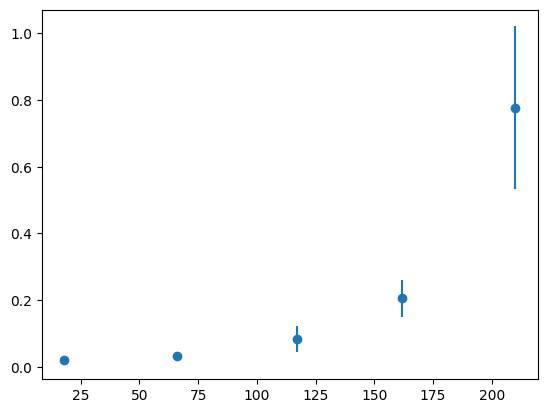

In [760]:
plt.scatter(X, y)
plt.errorbar(X, y, s, ls='')
plt.show()

In [773]:
def model_l(t, a, b, c):
    return np.exp(a+b*t)+c

In [785]:
popt, pcov = sc.optimize.curve_fit(model_l, X, y, p0=[1, 0.1, 0.01], sigma=s, maxfev = 50000)

In [775]:
np.sqrt(np.diag(pcov))

array([0.26488416, 0.00146084, 0.00212365])

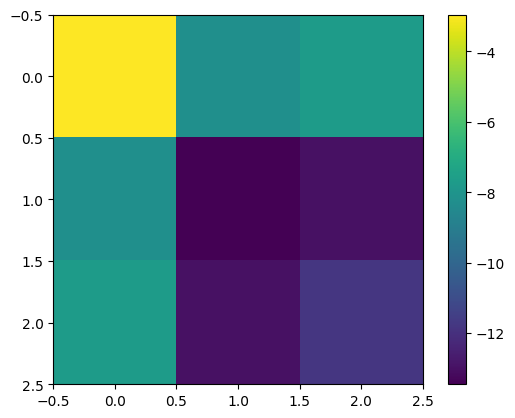

In [781]:
plt.imshow(np.log(np.abs(pcov)))
plt.colorbar()
plt.show()

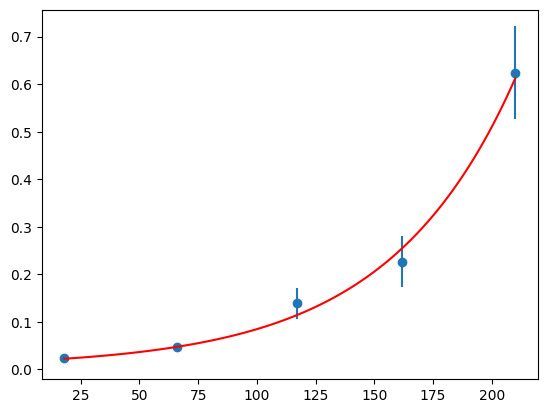

In [786]:
a, b, c = popt
x_model = np.linspace(min(X), max(X), 100)
y_model = model_l(x_model, a, b, c)

plt.scatter(X, y)
plt.errorbar(X, y, s, ls='')
plt.plot(x_model, y_model, color='r')
plt.show()

In [791]:
alpha = 0.05 # 95% confidence interval = 100*(1-alpha)

n = len(y)    # number of data points
p = len(popt) # number of parameters

dof = max(0, n - p) # number of degrees of freedom

# student-t value for the dof and confidence level
tval = t.ppf(1.0-alpha/2., dof) 

for i, p, var in zip(range(n), popt, np.diag(pcov)):
    sigma = var**0.5
    print('p{0}: {1} [{2}  {3}]'.format(i, p,
                                   p - sigma*tval,
                                   p + sigma*tval))

p0: -4.370146627975207 [-6.112195010866378  -2.628098245084036]
p1: 0.018437424864362232 [0.009487241392341346  0.027387608336383117]
p2: 0.00443975362600938 [-0.04460458712433738  0.053484094376356144]
